In [4]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colormaps

from typing import Tuple

In [5]:
def read_results(filename: str, dtype) -> Tuple[np.ndarray, int]:
    n = np.fromfile(file=filename, dtype=np.int64, count=1)[0]
    u = np.fromfile(file=filename, dtype=dtype, offset=8)

    assert n > 0, f"Expected `n` to be larger than zero, but is {n}"
    assert u.shape[0] % n == 0, f"Expected `u.shape[0] = {u.shape[0]}` to be divisible by `n = {n}`"

    return u.reshape((u.shape[0]//n, n)), n

In [6]:
# u, n = read_results("../output/compare_baseline/u_explicit_matrix_free.data", dtype=np.float64)
# u, n = read_results("../output/compare_baseline/u_explicit.data", dtype=np.float64)
u, n = read_results("../output/compare_baseline/u_implicit.data", dtype=np.float64)
print(f"{u.shape = }")

u.shape = (501, 1000)


In [7]:
xend = 1.0
dx   = xend / (n-1)

tend = 0.5
dt   = tend / (u.shape[0]-1)

In [8]:
t = np.asarray([i * dt for i in range(u.shape[0])])
x = np.asarray([i * dx for i in range(u.shape[1])])

In [9]:
print(f"{t.shape = }")
print(f"{x.shape = }")

t.shape = (501,)
x.shape = (1000,)


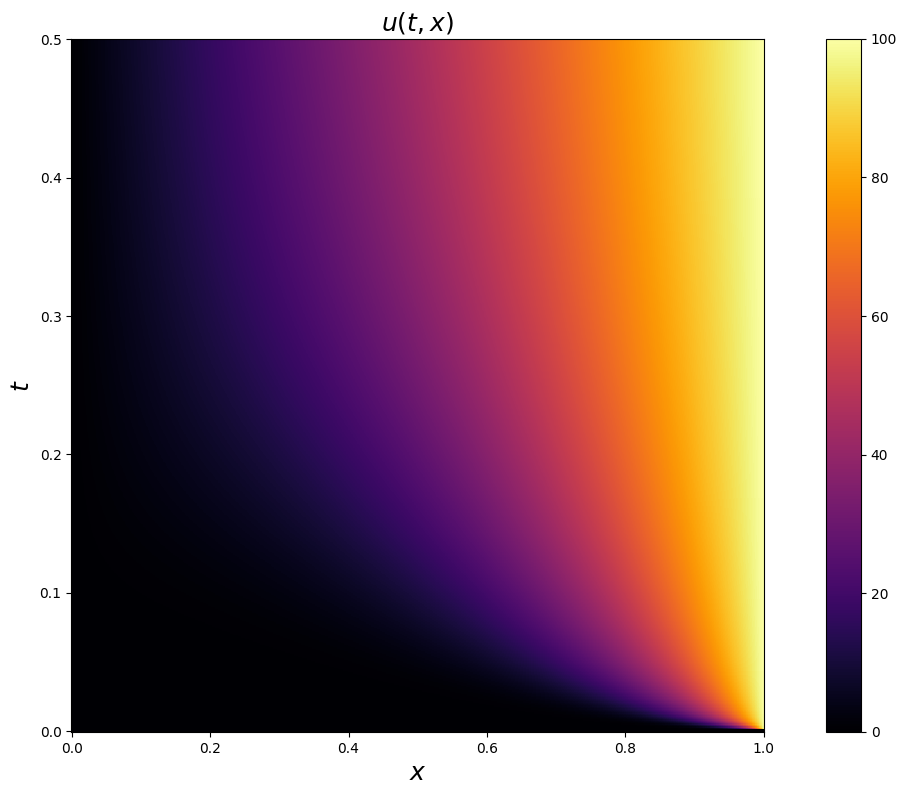

In [10]:
plt.figure(figsize=(16, 9))

c = plt.pcolormesh(x, t, u, cmap=colormaps['inferno'])
plt.colorbar(c)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$t$", fontsize=18)
plt.title("$u(t, x)$", fontsize=18)

plt.gca().set_box_aspect(1.0)

plt.show()